In [1]:
import os
import glob
import numpy as np
import h5py
import cv2
from skimage import io
import matplotlib.pyplot as plt

### Read data

In [2]:
addresses = glob.glob(os.getcwd()+"/Data1/*.TIF")
addresses = list(addresses)

addresses.sort()

In [3]:
data_dict = {}

for i in range(len(addresses)):
        data_dict['B'+str(i+1)] = io.imread(addresses[i],as_gray = True)


### Calculate NDVI of scene

In [4]:
ndvi = (data_dict['B4']-data_dict['B3'])/(data_dict['B4']+data_dict['B3'])
ndvi = np.nan_to_num(ndvi)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### Threshold
Threshold for calculating ndvi mask does not have a fixed value. Higher the amount of leaves and chlorophyll in plants, more will be the ndvi value.

For crops at peak health or dense forests: 0.6 - 0.9

For sparse vegetation such as shrubs and grasslands or senescing crops: 0.2 - 0.5

In [5]:
ndvi_mask = np.zeros(ndvi.shape)
threshold = (0.35,0.75)

#Any faster way to do this?
for i in range(ndvi.shape[0]):
        for j in range(ndvi.shape[1]):
                if (ndvi[i][j] >= threshold[0] and ndvi[i][j]<=threshold[1]):
                        ndvi_mask[i][j] = 1

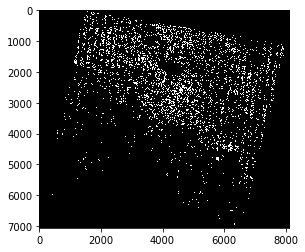

In [6]:
plt.imshow(ndvi_mask, cmap = 'gray')
plt.show()

### Binary erosion

In [7]:
kernel = np.ones((3,3),np.uint8)
ndvi_mask_eroded = cv2.erode(ndvi_mask,kernel,iterations = 1)

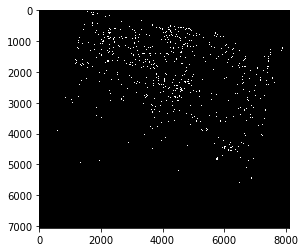

In [8]:
plt.imshow(ndvi_mask_eroded, cmap = 'gray')
plt.show()

### Plot original images 

Red:


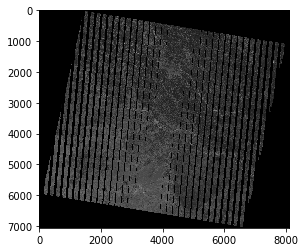

In [9]:
print('Red:')
plt.imshow(data_dict['B3'], cmap = 'gray')
plt.show()

Green:


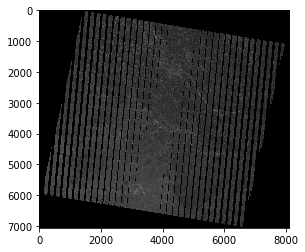

In [10]:
print('Green:')
plt.imshow(data_dict['B2'], cmap = 'gray')
plt.show()

Blue:


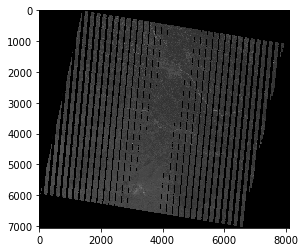

In [11]:
print('Blue:')
plt.imshow(data_dict['B1'], cmap = 'gray')
plt.show()

### Multiply with mask

In [12]:
for key in data_dict:
    data_dict[key] = np.multiply(ndvi_mask_eroded.astype(float),data_dict[key])

ValueError: operands could not be broadcast together with shapes (7061,8121) (14121,16241) 

In [13]:
for key in data_dict:
    print(data_dict[key].shape)

(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(14121, 16241)
(7061, 8121)


Red:


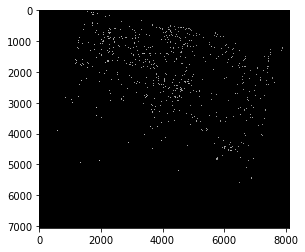

In [14]:
print('Red:')
plt.imshow(data_dict['B3'], cmap = 'gray')
plt.show()

Green:


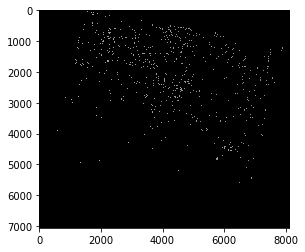

In [15]:
print('Green:')
plt.imshow(data_dict['B2'], cmap = 'gray')
plt.show()

Blue:


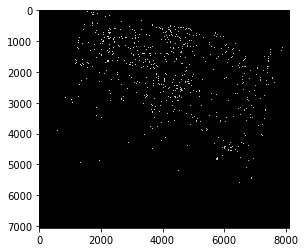

In [16]:
print('Blue:')
plt.imshow(data_dict['B1'], cmap = 'gray')
plt.show()

(7061, 8121, 3)


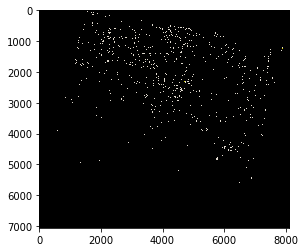

In [17]:
np.reshape(data_dict['B1'],(data_dict['B1'].shape[0],data_dict['B1'].shape[1],1) )
np.reshape(data_dict['B2'],(data_dict['B2'].shape[0],data_dict['B2'].shape[1],1) )
np.reshape(data_dict['B3'],(data_dict['B3'].shape[0],data_dict['B3'].shape[1],1) )

rgb = np.dstack((data_dict['B3'],data_dict['B2'],data_dict['B1']))
print(rgb.shape)

plt.imshow(rgb)
plt.show()

In [18]:
np.save('rgb',rgb)